# STATS 141XP Client Project: Mixed Effects Models

### Upload Data Set

In [2]:
import pandas as pd
import statsmodels.formula.api as smf

# Load the data
df = pd.read_csv("use_me_mixed_effects.csv")

# Rename the tarsus column to a simpler name
df = df.rename(columns={
    'Tarsus resected ( 0 for no tarsus, # for mm of tarsus removed)': 'tarsus_resected',
    'Change in MRD (post-pre)': 'change_mrd'
})

## Mixed Effects Model 1 (Random intercept for patient (id))

In [5]:
# Fit mixed effects model: random intercept for patient (id)
model = smf.mixedlm("change_mrd ~ tarsus_resected", df, groups=df["id"])
result = model.fit()

# Print summary
print(result.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: change_mrd
No. Observations: 26      Method:             REML      
No. Groups:       13      Scale:              1.9482    
Min. group size:  2       Log-Likelihood:     -46.7788  
Max. group size:  2       Converged:          Yes       
Mean group size:  2.0                                   
--------------------------------------------------------
                Coef. Std.Err.   z   P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept       1.808    0.421 4.297 0.000  0.983  2.633
tarsus_resected 0.297    0.530 0.559 0.576 -0.743  1.336
Group Var       0.414    0.573                          



### Interpretation

This model predicts change in MRD1 based on the amount of tarsus resected, with a random intercept for each patient. On average, patients gain 1.808 mm in MRD1 without any tarsus resection.

The coefficient for tarsus_resected (0.297) suggests that each additional mm of tarsus resected increases MRD1 change by approximately 0.3 mm, but this is not statistically significant since p = 0.576. The random effect (Group Var = 0.414) confirms patient-level variability in responses, justifying the use of a mixed model.

## Mixed Effects Model 2 (Predict Postop MRD1 Using Preop MRD1 and Tarsus Resected)

In [8]:
# Rename columns for easier access
df = df.rename(columns={
    'Preop_MRD1': 'preop_mrd1',
    'Most recent Post Op MRD1': 'postop_mrd1'
})

# Fit mixed effects model: predict postop MRD1 using preop MRD1 and tarsus resected
model2 = smf.mixedlm("postop_mrd1 ~ preop_mrd1 + tarsus_resected", df, groups=df["id"])
result2 = model2.fit()

# Display summary
print(result2.summary())

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: postop_mrd1
No. Observations: 26      Method:             REML       
No. Groups:       13      Scale:              0.0986     
Min. group size:  2       Log-Likelihood:     -24.9208   
Max. group size:  2       Converged:          Yes        
Mean group size:  2.0                                    
---------------------------------------------------------
                Coef. Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------
Intercept       2.788    0.227 12.262 0.000  2.342  3.233
preop_mrd1      0.074    0.061  1.216 0.224 -0.045  0.194
tarsus_resected 0.266    0.121  2.197 0.028  0.029  0.502
Group Var       0.520    1.095                           



### Interpretation

This model predicts postoperative MRD1 based on preoperative MRD1 and tarsus resection, again with random intercepts per patient. Preop MRD1 has a weak, non-significant effect on the outcome since p = 0.224.

Tarsus resected is a significant predictor since p = 0.028. So, for each mm resected, postoperative MRD1 increases by 0.266 mm. The random intercept shows a moderate level of between-patient variability (Group Var = 0.520), again supporting the need for mixed effects.

## Mixed Effects Model 3 (Model 2 With Age and Gender Included)

In [36]:
# Rename columns for easier access
df = df.rename(columns={
    'Age': 'age',
    'Gender (Male = 1, Female = 2)': 'gender',
    'Eye (OD=0, OS=1)': 'eye',
    'Surgery type on SX date': 'surgery'
})

# Fit mixed effects model: predict postop MRD1 using preop MRD1 and tarsus resected with age and gender included
model3 = smf.mixedlm("postop_mrd1 ~ preop_mrd1 + tarsus_resected + age + gender", df, groups=df["id"])
result3 = model3.fit()

# Display summary
print(result3.summary())

          Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: postop_mrd1
No. Observations:  26      Method:             REML       
No. Groups:        13      Scale:              0.0712     
Min. group size:   2       Log-Likelihood:     -24.9713   
Max. group size:   2       Converged:          Yes        
Mean group size:   2.0                                    
----------------------------------------------------------
                Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------
Intercept        8.156    2.541  3.209 0.001  3.175 13.137
preop_mrd1       0.046    0.054  0.850 0.396 -0.060  0.152
tarsus_resected  0.297    0.104  2.864 0.004  0.094  0.500
age             -0.077    0.036 -2.118 0.034 -0.148 -0.006
gender          -0.015    0.455 -0.033 0.974 -0.907  0.878
Group Var        0.584    1.518                           



### Interpretation

Tarsus resection has a strong and statistically significant positive effect on postoperative MRD1, suggesting that performing a resection improves surgical outcomes. Age is a small but significant negative predictor. This suggests that older patients have slightly less lift. On the other hand, gender has no predictive power. The random effect, patient ID, is useful because there is intergroup variation, and the model accounts for it. As supported by the table, there is a moderate level of between-patient variability (Group Var = 0.584).

# Mixed Effects Model 4 (Model 3 With Eye Side Instead of Patient ID)

In [38]:
# Fit mixed effects model: Model 3 With Eye Side
model4 = smf.mixedlm("postop_mrd1 ~ preop_mrd1 + tarsus_resected + age + gender", df, groups=df["surgery"])
result4 = model4.fit()

# Display summary
print(result4.summary())

          Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: postop_mrd1
No. Observations:  26      Method:             REML       
No. Groups:        14      Scale:              0.1881     
Min. group size:   1       Log-Likelihood:     -29.6111   
Max. group size:   4       Converged:          Yes        
Mean group size:   1.9                                    
----------------------------------------------------------
                Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------
Intercept        8.992    3.120  2.882 0.004  2.876 15.107
preop_mrd1       0.116    0.104  1.123 0.261 -0.087  0.319
tarsus_resected  0.326    0.184  1.775 0.076 -0.034  0.686
age             -0.087    0.044 -1.964 0.050 -0.174 -0.000
gender          -0.087    0.421 -0.206 0.837 -0.913  0.739
Group Var        0.456    0.996                           



### Interpretation

The tarsus resection effect is still positive but less statistically significant than in Model 3. This may suggest that surgery type itself explains some of that variation. Age remains a small negative predictor. The random effects for surgical type explain a smaller portion of the variance compared to random intercepts for patient ID. As supported by the table, there is a moderate level of between-patient variability (Group Var = 0.456).

### Summary Write-up

The results of the four mixed effects models explore the effect of tarsus resected, preoperative MRD1, age, and gender on postoperative MRD1 outcomes, while accounting for within-subject variability. In Model 1, the predictor tarsus_resected did not reach statistical significance, with p = 0.576. This indicates that when considered alone, the amount of tarsus removed does not significantly explain MRD1 change. Model 2, which adds preoperative MRD1 as a covariate and predicts postoperative MRD1, shows that tarsus_resected becomes statistically significant, with p = 0.028. This suggests that when controlling for starting eyelid position, resecting more tarsus may result in improved elevation. However, preoperative MRD1 itself is not significant in this model, with p = 0.224. This can possibly be due to collinearity or limited sample size.

Model 3 extends the analysis by adding age and gender as fixed effects. In this model, tarsus_resected remains statistically significant, with p = 0.004. Additionally, age becomes a significant negative predictor, with p = 0.034. This result indicates that older patients tend to have lower MRD1 measurements postoperatively. Gender remains non-significant throughout all models. In Model 4, we replace the patient ID grouping with surgery type as the random effect. Here, the significance of tarsus_resected weakens slightly, with p = 0.076, and age remains borderline significant, with p = 0.050. This suggests that surgery type may explain additional variability not captured by individual patient ID alone. Overall, across models, the positive effect of tarsus resection appears more robust when other covariates (like preop MRD1 and age) are included, suggesting its effect is conditional and context-dependent. The results also support modeling patients' postoperative MRD1 using appropriate random effects (patient ID and surgery type).

## Exploratory Data Analysis

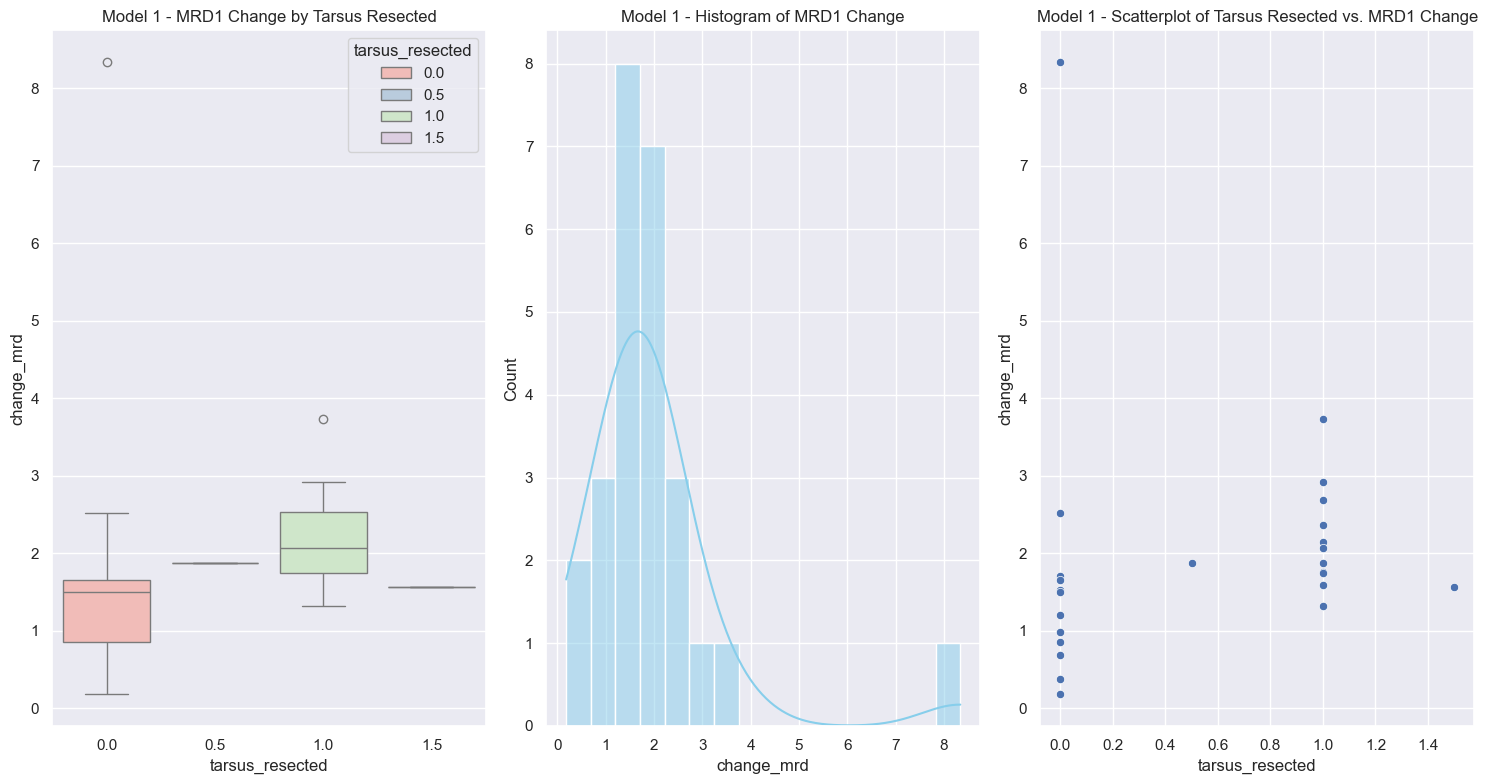

In [100]:
# Plot Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# --- Model 1: Boxplot and Histogram ---

sns.set_theme(rc={'figure.figsize':(15, 8)}, style='darkgrid')

plt.subplot(1, 3, 1)
sns.boxplot(x='tarsus_resected', y='change_mrd', data=df, hue="tarsus_resected", palette='Pastel1')
plt.title('Model 1 - MRD1 Change by Tarsus Resected')

plt.subplot(1, 3, 2)
sns.histplot(df['change_mrd'].dropna(), kde=True, color='skyblue')
plt.title('Model 1 - Histogram of MRD1 Change')

plt.subplot(1, 3, 3)
sns.scatterplot(x='tarsus_resected', y='change_mrd', data=df)
plt.title('Model 1 - Scatterplot of Tarsus Resected vs. MRD1 Change')

plt.tight_layout()
plt.show()

### Interpretation (Model 1)

**Boxplot:** Outliers are visible in the 0.0 and 1.0 categories, suggesting some unusually high MRD1 changes without much tarsus resection.

**Histogram:** A right-skewed distribution indicates a few patients had large MRD1 changes.

**Scatterplot:** MRD1 change does not increase clearly with increasing tarsus_resected. The large spread across values suggests individual variability.

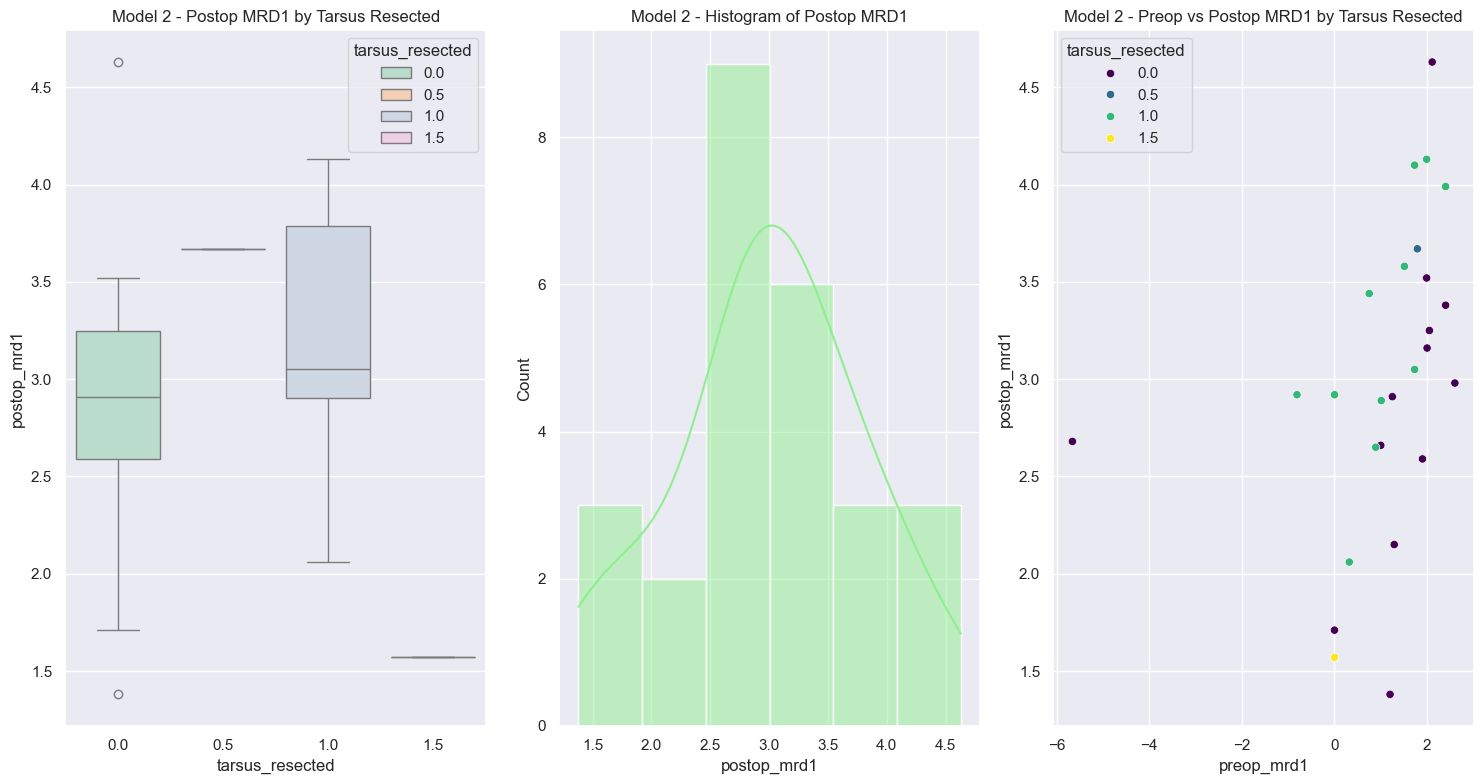

In [102]:
# --- Model 2: Scatter and Histogram ---

sns.set_theme(rc={'figure.figsize':(15, 8)}, style='darkgrid')

plt.subplot(1, 3, 1)
sns.boxplot(x='tarsus_resected', y='postop_mrd1', data=df, hue='tarsus_resected', palette='Pastel2')
plt.title('Model 2 - Postop MRD1 by Tarsus Resected')

plt.subplot(1, 3, 2)
sns.histplot(df['postop_mrd1'].dropna(), kde=True, color='lightgreen')
plt.title('Model 2 - Histogram of Postop MRD1')

plt.subplot(1, 3, 3)
sns.scatterplot(x='preop_mrd1', y='postop_mrd1', hue='tarsus_resected', data=df, palette='viridis')
plt.title('Model 2 - Preop vs Postop MRD1 by Tarsus Resected')

plt.tight_layout()
plt.show()

### Interpretation (Model 2)

**Boxplot:** Higher tarsus resection may lead to slightly higher median postop MRD1. However, overlap across groups suggests that tarsus resection alone does not explain all the variance.

**Histogram:** Postop MRD1 is more normally distributed, with moderate symmetry. This suggests model assumptions such as normality may be reasonable.

**Scatterplot:** There is a positive correlation between preop and postop MRD1. The color spread shows all tarsus groups are distributed, but no clear effect of group is visible visually.

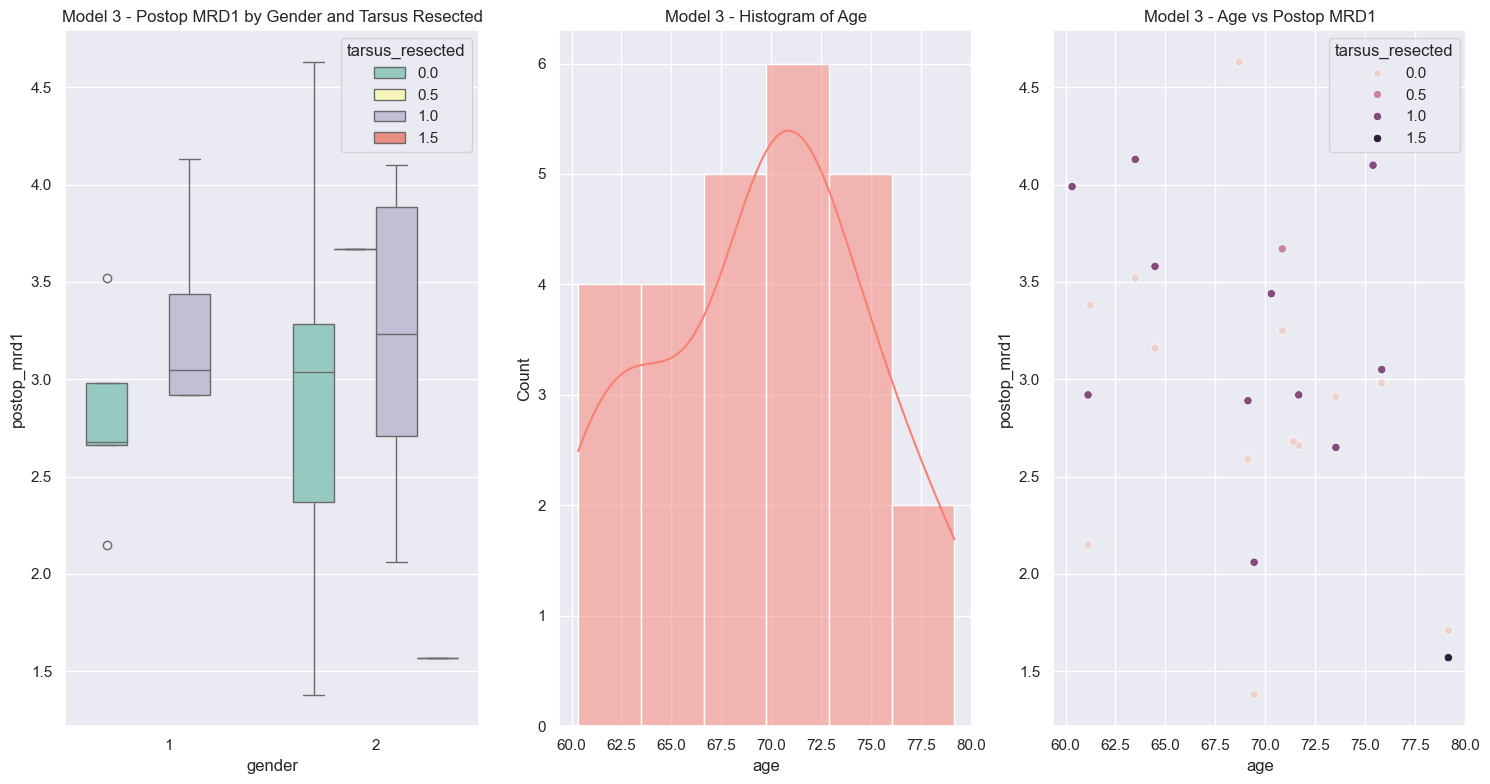

In [104]:
# --- Model 3: Gender-Stratified Boxplot & Histogram ---

sns.set_theme(rc={'figure.figsize':(15, 8)}, style='darkgrid')

plt.subplot(1, 3, 1)
sns.boxplot(x='gender', y='postop_mrd1', hue='tarsus_resected', data=df, palette='Set3')
plt.title('Model 3 - Postop MRD1 by Gender and Tarsus Resected')

plt.subplot(1, 3, 2)
sns.histplot(df['age'].dropna(), kde=True, color='salmon')
plt.title('Model 3 - Histogram of Age')

plt.subplot(1, 3, 3)
sns.scatterplot(x='age', y='postop_mrd1', hue='tarsus_resected', data=df)
plt.title('Model 3 - Age vs Postop MRD1')

plt.tight_layout()
plt.show()

### Interpretation (Model 3):

**Boxplot:** The boxplot suggests that gender may slightly interact with tarsus resection. Females with more tarsus removed appear to have higher MRD1, but the pattern is not strongly conclusive due to overlap and outliers.

**Histogram:** Age is reasonably symmetric, which helps in regression modeling.

**Scatterplot:** There is a slight negative relationship between age and MRD1 change. This is consistent with the significant negative effect of age found in Model 3 summary (p = 0.034).

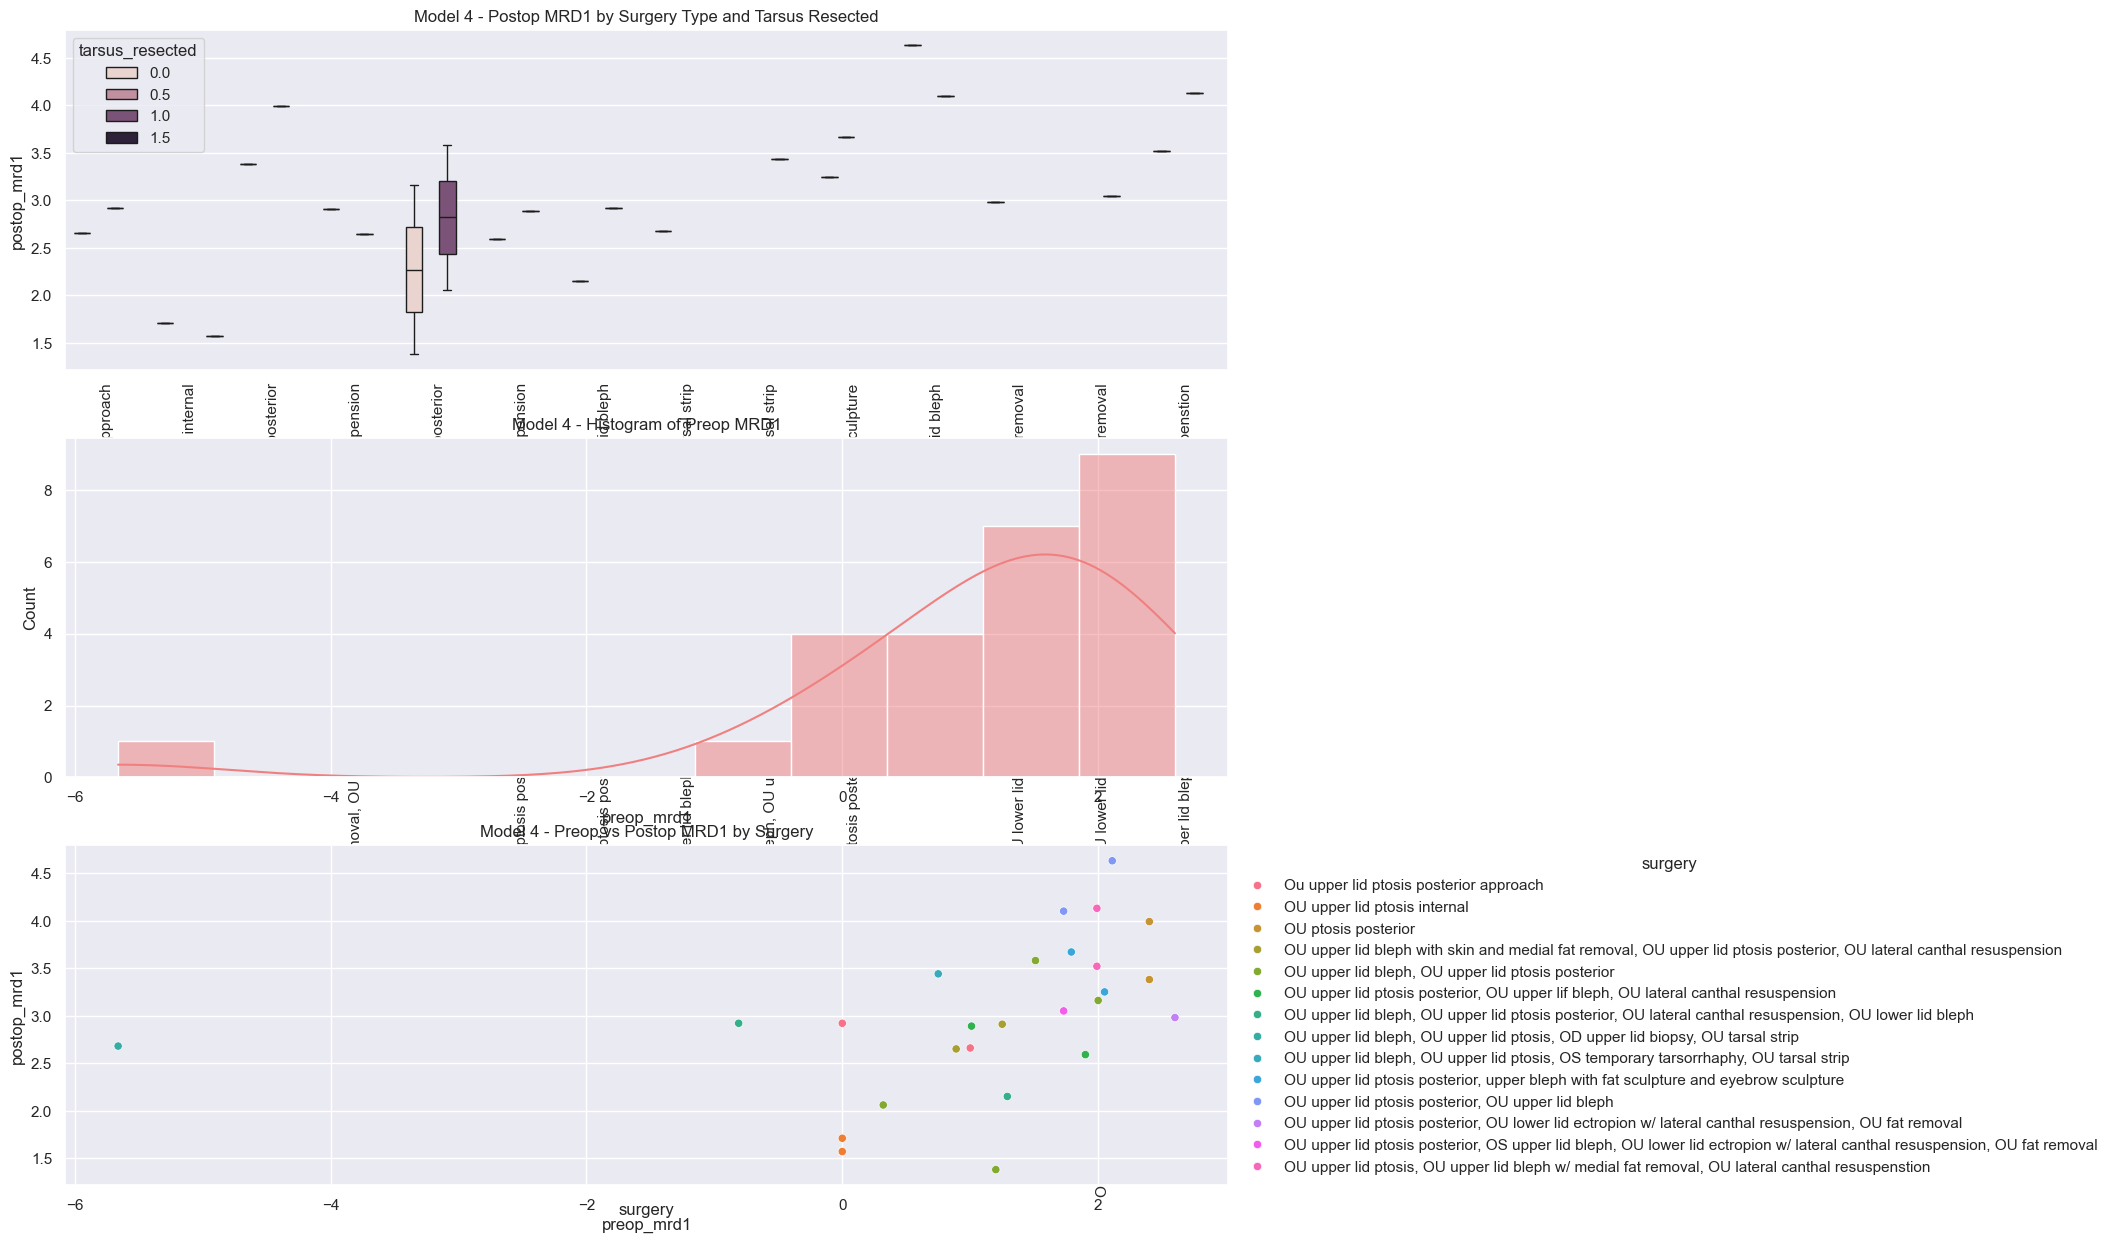

In [118]:
# --- Model 4: By Surgery Type ---

sns.set_theme(rc={'figure.figsize':(15, 15)}, style='darkgrid')

plt.subplot(3, 1, 1)
sns.boxplot(x='surgery', y='postop_mrd1', hue='tarsus_resected', data=df)
plt.xticks(rotation=90)
plt.title('Model 4 - Postop MRD1 by Surgery Type and Tarsus Resected')

plt.subplot(3, 1, 2)
sns.histplot(df['preop_mrd1'].dropna(), kde=True, color='lightcoral')
plt.title('Model 4 - Histogram of Preop MRD1')

plt.subplot(3, 1, 3)
sns.scatterplot(x='preop_mrd1', y='postop_mrd1', hue='surgery', data=df)
plt.title('Model 4 - Preop vs Postop MRD1 by Surgery')

# Move legend to the right side
sns.move_legend(
    plt.subplot(3, 1, 3), # object with the plot
    loc='center left', # position of the legend
    bbox_to_anchor=(1, 0.5), # anchor point
    frameon=False # remove the legend frame
)

plt.show()

### Interpretation (Model 4):

**Boxplot:** The boxplot shows heterogeneity across surgery types. There are some types consistently associated with higher/lower MRD1 outcomes. This suggests that surgery type has influence and is a good candidate for random effect modeling.

**Histogram:** Preop MRD1 distribution is right-skewed and heavy-tailed. This could suggest that including preop MRD1 as a continuous predictor helps adjust for the initial degree of impact.

**Scatterplot:** The clustered scatter by surgery reveals both pattern and noise. From looking at the plot, there is evidence that certain surgeries consistently perform better or worse.

## Residuals and Diagnostic Plots

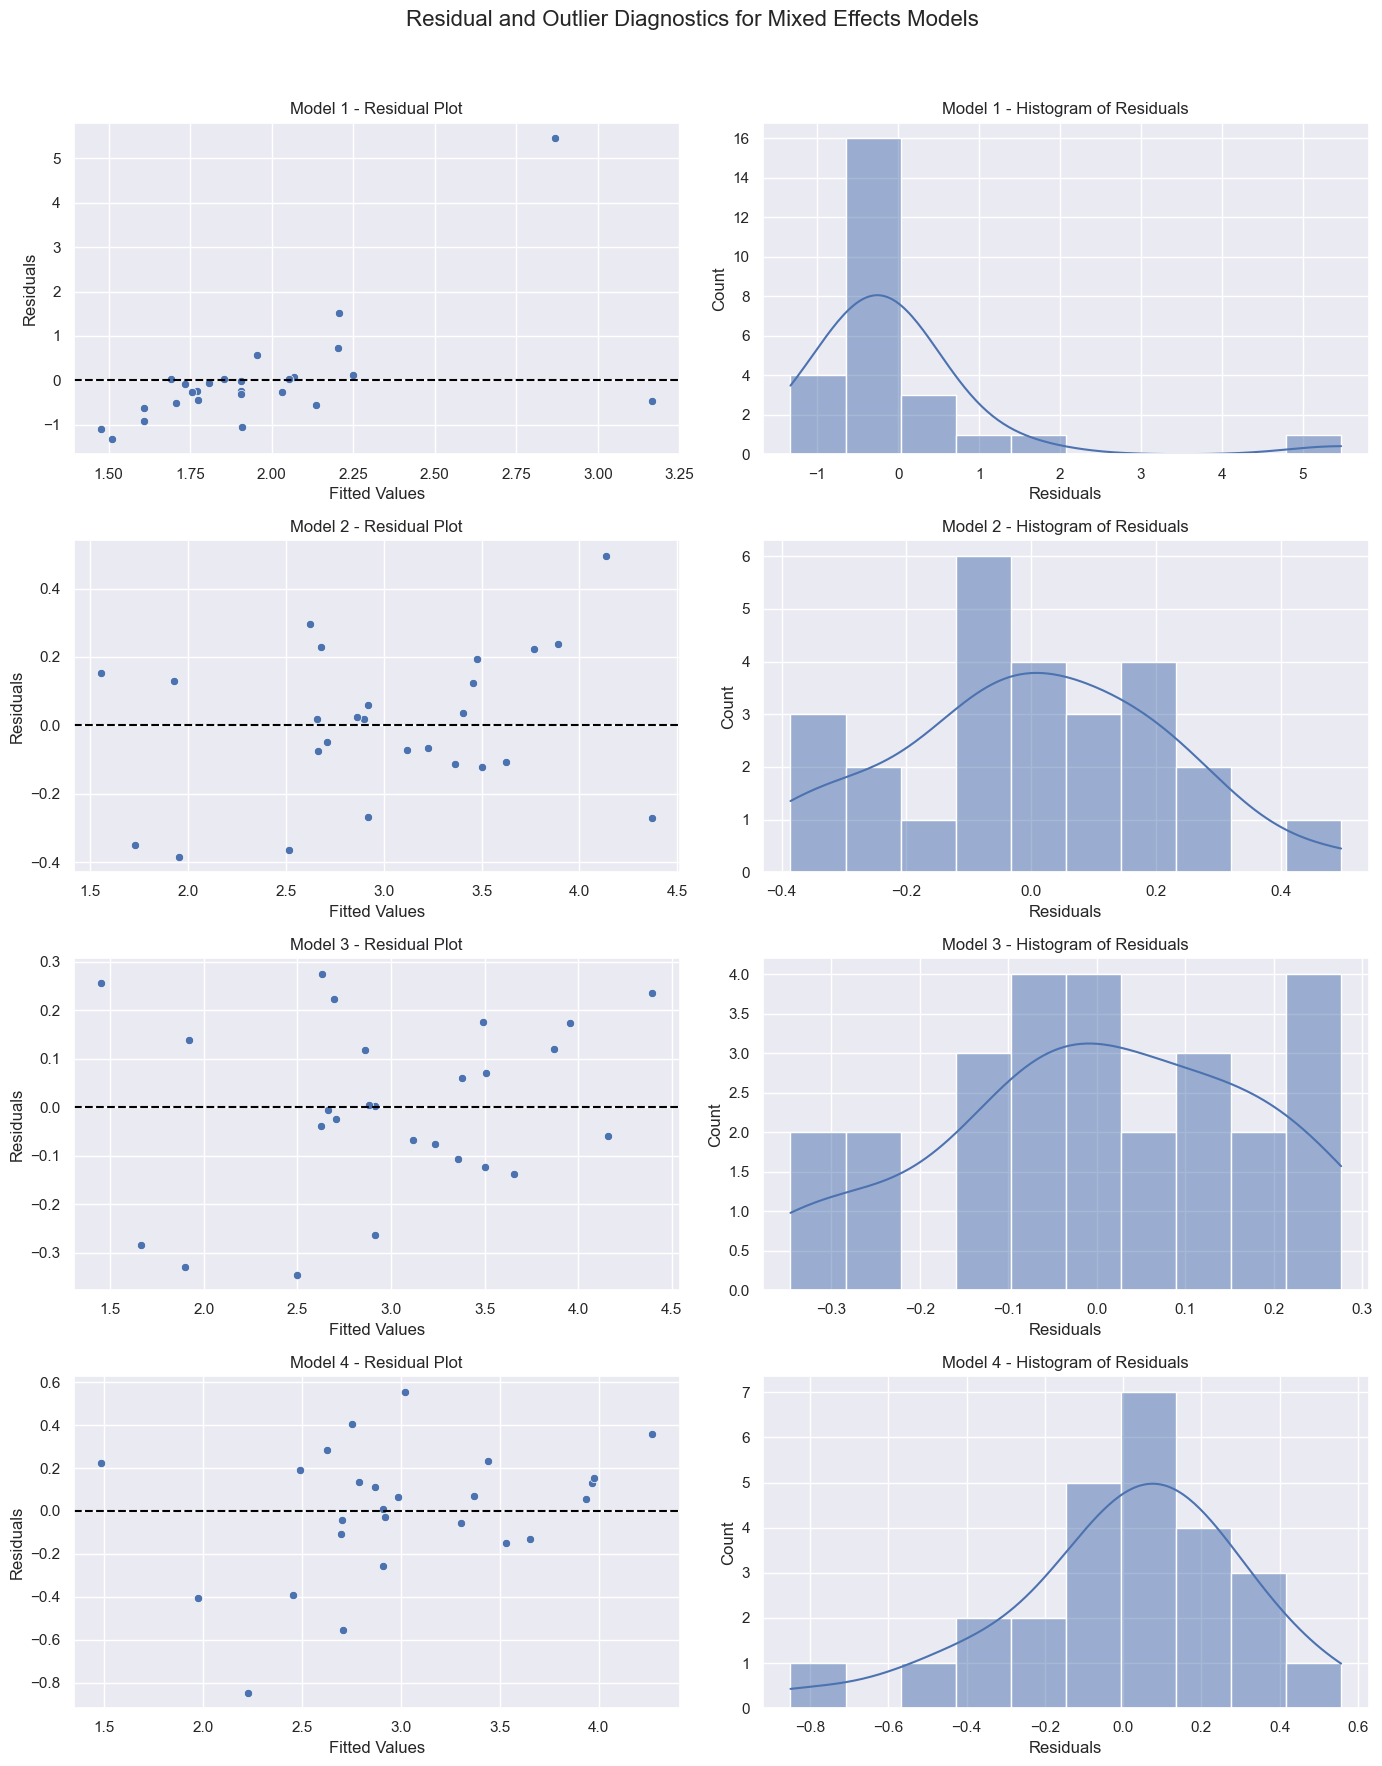

In [125]:
# Drop rows with NA in relevant columns
df = df.dropna(subset=['change_mrd', 'preop_mrd1', 'postop_mrd1', 'tarsus_resected', 'age', 'gender', 'id', 'surgery'])

# Refit the models with cleaned data
model1 = smf.mixedlm("change_mrd ~ tarsus_resected", df, groups=df["id"]).fit()
model2 = smf.mixedlm("postop_mrd1 ~ preop_mrd1 + tarsus_resected", df, groups=df["id"]).fit()
model3 = smf.mixedlm("postop_mrd1 ~ preop_mrd1 + tarsus_resected + age + gender", df, groups=df["id"]).fit()
model4 = smf.mixedlm("postop_mrd1 ~ preop_mrd1 + tarsus_resected + age + gender", df, groups=df["surgery"]).fit()

# Store models in a dictionary
models = {
    "Model 1": model1,
    "Model 2": model2,
    "Model 3": model3,
    "Model 4": model4
}

# Diagnostic plots
fig, axes = plt.subplots(4, 2, figsize=(14, 18))
fig.suptitle("Residual and Outlier Diagnostics for Mixed Effects Models", fontsize=16)

for i, (name, model) in enumerate(models.items()):
    resid = model.resid
    fitted = model.fittedvalues

    # Residual vs Fitted
    sns.scatterplot(x=fitted, y=resid, ax=axes[i, 0])
    axes[i, 0].axhline(0, linestyle='--', color='black')
    axes[i, 0].set_title(f"{name} - Residual Plot")
    axes[i, 0].set_xlabel("Fitted Values")
    axes[i, 0].set_ylabel("Residuals")

    # Histogram of Residuals
    sns.histplot(resid, kde=True, ax=axes[i, 1], bins=10)
    axes[i, 1].set_title(f"{name} - Histogram of Residuals")
    axes[i, 1].set_xlabel("Residuals")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Model 1:

**Residual Plot:** One clear outlier with a very high residual. Most other residuals cluster tightly around 0.

**Histogram:** Strong right skew due to that outlier. Residuals are not normally distributed.

**Interpretation:** This indicates a possible model misfit or a single patient with an unusually large MRD change after tarsus resection.

### Model 2:

**Residual Plot:** Residuals more symmetrically scattered, no extreme outliers.

**Histogram:** Fairly symmetric, which is an improvement from Model 1.

**Interpretation:** This indicates that including preoperative MRD1 improves model performance and reduces residual variance.

### Model 3:

**Residual Plot:** Residuals tightly clustered around 0 with a small spread.

**Histogram:** Also symmetric, residuals appear fairly normal.

**Interpretation:** This indicates that model 3 also appears to be an improvement, as the additional covariates reduce unexplained variability.

### Model 4:

**Residual Plot:** Some slightly larger residuals, but no clear outliers.

**Histogram:** Not as symmetric, but the residuals are still approximately normal.

**Interpretation:** This indicates that model 4 is less of a tight fit than model 3. This may be due to weaker grouping structure, as surgery type is likely less personalized than patient ID.